In [1]:
# %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data make dataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df.head()
ride_data_df.head()

# Combine the data into a single dataset merge on city
cityride_data_df = pd.merge(ride_data_df,city_data_df, how = 'left', on = 'city' )
cityride_data_df.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

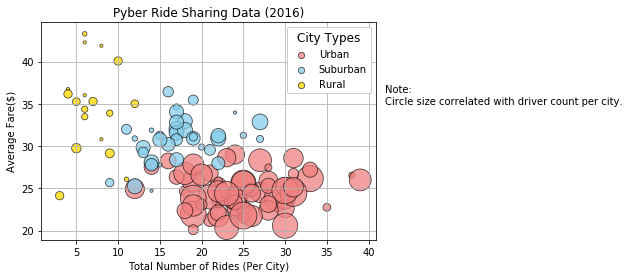

In [9]:
# Obtain the x and y coordinates for each of the three city types
#set the city types x and their colors -y
cityTypes = ["Urban", "Suburban","Rural"]
citycolors = ["lightcoral", "Skyblue", "Gold"]

# create for loop for city type to be filter
for ct in range(len(cityTypes)):
    # create group DAtaFrame and indexed by city
    citytype_grp_df = cityride_data_df.set_index("type").loc[cityTypes[ct],:].groupby("city")
    citytype_grp_df
    
    # average fare ($) per city -y axis
    avg_fare = citytype_grp_df["fare"].mean()
        
    # cAlculate total no of rides per cit"y(x-axis)
    total_ride = citytype_grp_df["city"].value_counts()
    
    # calculate total no of drivers per city for bubble size
    drv_city = citytype_grp_df["driver_count"].mean()

    # Build the scatter plots for each city types
    # Incorporate the other graph properties
    plt.scatter(total_ride,avg_fare, s=(drv_city*10), 
                facecolor=citycolors[ct], edgecolor="black", alpha=0.75, linewidth=0.75)

# Create a legend and format chart 
# Incorporate a text label regarding circle size
pyber_legend = plt.legend(cityTypes, loc="best", framealpha=1)
pyber_legend.set_title("City Types", prop={"size":"large"})

for i in range(len(cityTypes)):
    pyber_legend.legendHandles[i]._sizes = [40]

plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(42,35, "Note:\nCircle size correlated with driver count per city.")

# Save Figure
#plt.tight_layout()
plt.savefig("../images/pyber_bubbleplot.png")
plt.show()

In [3]:
# Show plot
plt.show()

# Total Fares by City Type

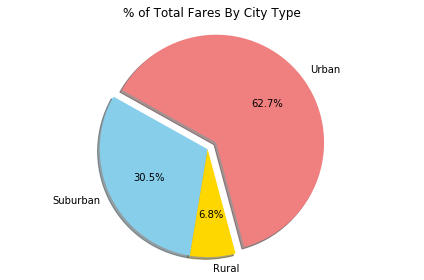

In [12]:
# Calculate Type % of total fares

ctypeFare = [0,0,0]
explode = (0.1,0,0)

# sum of fare for each city types

for cty in range(len(cityTypes)):
    type_fare_df = cityride_data_df.set_index("type").loc[cityTypes[cty],:]
    ctypeFare[cty]= type_fare_df["fare"].sum()

# Build Pie Chart
plt.pie(ctypeFare,explode=explode, labels=cityTypes, colors=citycolors, 
        autopct="%1.1f%%", shadow=True, startangle=285)
plt.axis("equal")
plt.title("% of Total Fares By City Type")

# Save Figure
plt.tight_layout()
plt.savefig("../images/pyber_tfaresbycitytype_pie.png")
plt.show()


In [13]:
# Show Figure
plt.show()

# Total Rides by City Type

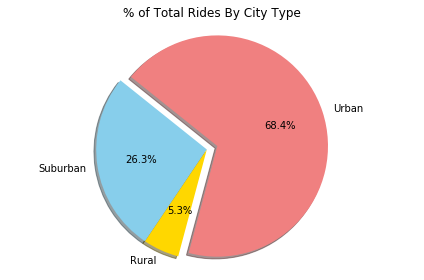

In [16]:
# Calculate %  total Rides 
ctypeRide = [0,0,0]
explode = (0.1,0,0)

#sum of rides for each of the city types
for r in range(len(cityTypes)):
    total_ride_df = cityride_data_df.set_index("type").loc[cityTypes[r],:]
    ctypeRide[r]= total_ride_df["fare"].count()

# Build Pie Chart
plt.pie(ctypeRide,explode=explode, labels=cityTypes, colors=citycolors, 
        autopct="%1.1f%%", shadow=True, startangle=255)
plt.axis("equal")
plt.title("% of Total Rides By City Type")

# Save Figure
plt.tight_layout()
plt.savefig("../images/pyber_tridesbycitytype_pie.png")
plt.show()

In [17]:
# Show Figure
plt.show()

## Total Drivers by City Type

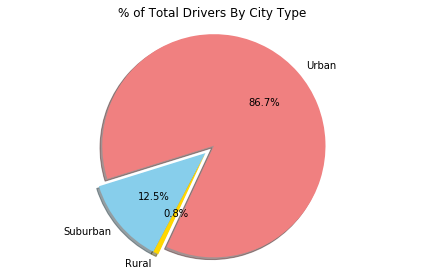

In [19]:
# Calculate % total Driver 
ctDrivers= [0,0,0]
explode = (0.1,0,0)

#sum of rides for each of the city types
for r in range(len(cityTypes)):
    total_drivers_df = cityride_data_df.set_index("type").loc[cityTypes[r],:]
    ctDrivers[r]= total_drivers_df["driver_count"].sum()

# Build Pie Chart
plt.pie(ctDrivers,explode=explode, labels=cityTypes, colors=citycolors, 
        autopct="%1.1f%%", shadow=True, startangle=245)
plt.axis("equal")
plt.title("% of Total Drivers By City Type")

# Save Figure
plt.tight_layout()
plt.savefig("../images/pyber_tDriversbycitytype_pie.png")
plt.show()

In [20]:
# Show Figure
plt.show()